# Inferential statistics II - Bootstrapping

## Introduction

In the previous frequentist mini-projects, you did frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th-Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold for the particular case you're working on, and what you want to do has a known theoretical distribution (for example the mean of a sampling distribution that we looked at in the previous mini-project.)

In this mini-project, you'll use the same medical charge data you used in the frequentist inference mini-project, but this time you'll make inferences about the population using bootstrapping (ie. simulating repeated re-runs of an experiment.) If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

While these exercises do not strictly depend on these concepts, we encourage you to complete the previous mini-projects before starting this one so that you can approach this assignment with a good understanding of frequentist concepts like:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete mini-project, it's important that you first complete the bootstrap resources listed in this subunit, as they contain valuable information about how to calculate bootstrap replicates of summary statistics. Having an basic understanding of what confidence intervals and p-values are will also be helpful (we touch on them in this mini-project, but please speak to your mentor or conduct individual research if you'd like to learn more.) 

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [2]:
med_charges = pd.read_csv('data/insurance2.csv')

In [3]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__ The result is $12,724.47.

This means that if a collection of medical charges has a mean less than this number, we can be 95% sure that the collection was not sampled from our population, because 95% of our random samples produce a mean greater than this number.

In [4]:
np.random.seed(47)
N_rep = 10000

### Creating BootStrap Function:

def bootstrap_function (data,func,size=1):
    """ SUMMARY
    
        Takes in data assuming data is an array or has an array method, makes a bootstrap replica of that data and computes the summary statistic func assuming func can be applied to array.
        It repeats this size many times, each time saving the result to an array and outputting the array 
        
        INPUTS
        
        data: Data to replicate needs to be array or has array method
        func: Summary stat to compute, needs to be able to take in an array
        size: number of replicates to compute
        
        OUTPUTS
        
        bootstrap_replicates: array of bootstrap replicates of summary statistic"""
    
    
    bootstrap_replicates=np.empty(size) # To-be-array of summary statistics calculated for replicates
    
    if type(data)!= type(np.empty(0)): # Converts data to array if not an array
        
        tempdata=data.array
        
    else:
        tempdata=data
        
        
    for i in range(size):
        
        bootstrap_replicates[i]=func(np.random.choice(tempdata,len(tempdata)))# returns summary statistic of an array with same length as data
                                                                              # created by sampling data with replacement
        
    return bootstrap_replicates



### Conducting Left Tailed Test:

np.random.seed(47)

mean_of_charges_bootstrap_sample=bootstrap_function(med_charges.charges,np.mean,N_rep) # bootstrapping med_charges

LL=np.percentile(mean_of_charges_bootstrap_sample,[5])[0] # Calculating lower limit for left tailed test on 95 confidence interval 
                                                       #(5 percentile)

print('With 95% confidence the lowest mean we could expect from this population is: $',round(LL,2),sep='')


With 95% confidence the lowest mean we could expect from this population is: $12724.47


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__ The null hypothesis in this case is that there is no difference between the group with insurance and without insurance, the alternative hypothesis being that there is. The 95% confidence interval of the difference in the standard deviations of the resampled groups is \\$6\,670\.02 to \\$8\,504\.75. Since this does not include a difference of zero we can conclude that the standard deviations of the populations are different.

In [5]:
### Filtering by insurance: 
  # Creating 2 arrays from med_charges, by filtering on insuranceclaim boolean

insurance_bool=med_charges.insuranceclaim==1

# Defining insurance having and non-insurance having groups
has_insurance=np.array(med_charges.charges.loc[insurance_bool])
has_no_insurance=np.array(med_charges.charges.loc[~insurance_bool])


actual_diff_in_std=np.std(has_insurance)-np.std(has_no_insurance)

print('The actual difference in the standard deviation is: $',round(actual_diff_in_std,2),sep='')



The actual difference in the standard deviation is: $7596.26


In [6]:
### Bootstrapping std difference:

  # to make the difference of mean replicate, first a bootstrap replicate of each group was created using the std
  # as a summary statistic, and then the difference between the resulting replicates were taken
 
has_insurance_std_replicates=bootstrap_function(has_insurance,np.std,N_rep)

has_no_insurance_std_replicates=bootstrap_function(has_no_insurance,np.std,N_rep)

difference_in_std_bs_replicates=has_insurance_std_replicates-has_no_insurance_std_replicates


the 95% confidence interval is $6670.02 to $8504.75


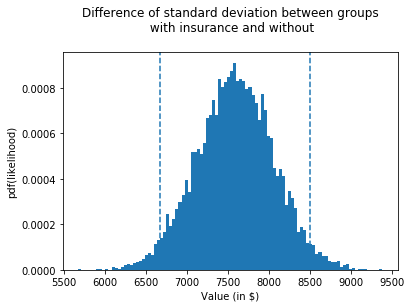

In [7]:
### Plotting:

CL_95=np.percentile(difference_in_std_bs_replicates,[2.5,97.5]) # Calculating 95 confidence interval


_=plt.hist(difference_in_std_bs_replicates,bins=100,density=True)
_=plt.title('Difference of standard deviation between groups\n with insurance and without\n')

_=plt.xlabel('Value (in $)')
_=plt.ylabel('pdf(likelihood)')

# vertical lines
_=plt.axvline(CL_95[0],linestyle='dashed')# 2.5 percentile
_=plt.axvline(CL_95[1],linestyle='dashed')# 97.5 percentile


print('the 95% confidence interval is $',round(CL_95[0],2),' to $',round(CL_95[1],2),sep='') 


## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__ Null hypothesis is that there is no difference of between the insurance group and non-insurance group, and that that the observed difference in mean arise from sampling this population with a reasonable probability. The alternative hypothesis is that there is in fact a difference. I would reject the null hypothesis 

In [8]:
### Creating function take difference in means of insurance group and no insurance group
  # assuming there is no difference between groups:

  # To assume there is no difference between the insurance and non-insurance groups we randomly shuffle 
  # The two groups together and call the first len(has_insurance)-1 the has_insurance group and remaining
  # has_no_insurance group. This shuffling and splitting is done in a function so that it can be passed to 
  # bootstrap_function

charges_concat=np.concatenate((has_insurance,has_no_insurance))

def diff_means_of_concat_arrays(concat_data,split=len(has_insurance)):
    """ SUMMARY
    
        Splits an array into two groups and take the difference of means between them. For purposes of this
        excercise split is set to len(has_insurance) to split the array accordingly.
        
        INPUTS
        
        concat_data: an array, presumably the concatenated data 
        split: determines how array will be split into arrays, initialized to len(has_insurance) for task
        
        OUTPUTS
        
        (no variable name): mean of differences as float or int
       
       """
    
    perm_concat=np.random.permutation(concat_data) #randomly shuffling data
    
    perm_first= perm_concat[:split] #splitting groups: has_insurance
    
    perm_second=perm_concat[split:]# has_no_insurance
    
    return np.mean(perm_first)-np.mean(perm_second)

In [9]:
### Calculating Bootstrap replicates assuming no difference:
      
diff_mean_replicates=bootstrap_function(charges_concat,diff_means_of_concat_arrays,N_rep)
    

In [10]:
### Calculating P Value

actual_diff_mean= np.mean(has_insurance)-np.mean(has_no_insurance)

p_value= np.sum(np.absolute(diff_mean_replicates)>=actual_diff_mean)/len(diff_mean_replicates)

print("The P value is:", p_value)

The P value is: 0.0


__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__ Because we are calculating an absolute difference, the value of the acutal difference can arise in two ways: if the mean of has_insurance is that value greater than mean of has_no_insurance or if the mean of has_no_insurace is greater than mean has_insurance by that value (namely it is the negative version of the actual).

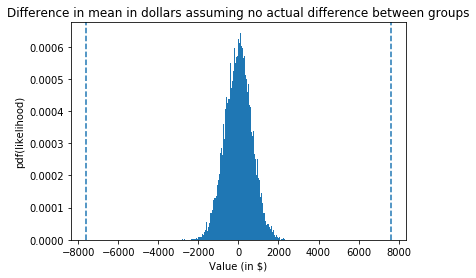

In [11]:
# Plotting and taking actual difference in means

actual_diff_mean=np.mean(has_insurance)-np.mean(has_no_insurance)

_=plt.hist(diff_mean_replicates,bins=100,density=True)
_=plt.title('Difference in mean in dollars assuming no actual difference between groups')

_=plt.xlabel('Value (in $)')
_=plt.ylabel('pdf(likelihood)')

_=plt.axvline(actual_diff_mean,linestyle='dashed')
_=plt.axvline(-actual_diff_mean,linestyle='dashed')

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__ The p-value observed in the last excersise what on the order of positive E-31. I do not think I run enough bootstrap replicates to get that accurate of a value and do it in a sensible amount of time.

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__ I would use the non-pooled standard deviation variant as the standard deviations of the group are almost guarenteed to be different (based on 2nd bootstrap question in this excersise)

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__ I would probably do a one sided right tailed test with a null hypothesis of there being no significant increase in the click through rate using version B versus A. The alternative hypothesis would therefore be that there was a significant increase in click through rate using B rather than A. If we reject the null hypothesis with enough confidence, the result would be that the company will use B rather than A, and we would be hoping that we got it right.

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.